# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Shutdown Warning
Shut warning in order to make process more clearer

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

In [3]:
data = pd.read_csv('dubai_properties.csv')
data

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


## Statistical Summary of Data

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rent,73742.0,147925.001668,306965.830103,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73742.0,2.162811,1.578155,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73742.0,2.650213,1.632997,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73742.0,2054.053552,3003.919252,74.000000,850.000000,1334.000000,2130.000000,2.102540e+05
Rent_per_sqft,73742.0,88.057754,66.534400,0.000000,39.977778,71.428571,118.483412,2.182045e+03
Age_of_listing_in_days,73742.0,74.261547,72.346767,11.000000,30.000000,52.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01


## Data Types and NULL Data Entry

### Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

### NULL Entries

In [6]:
data.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

# Exploratory Data Analysis (EDA)

## Relationship between Features

### Rent (Property Rent) -> Target Feature

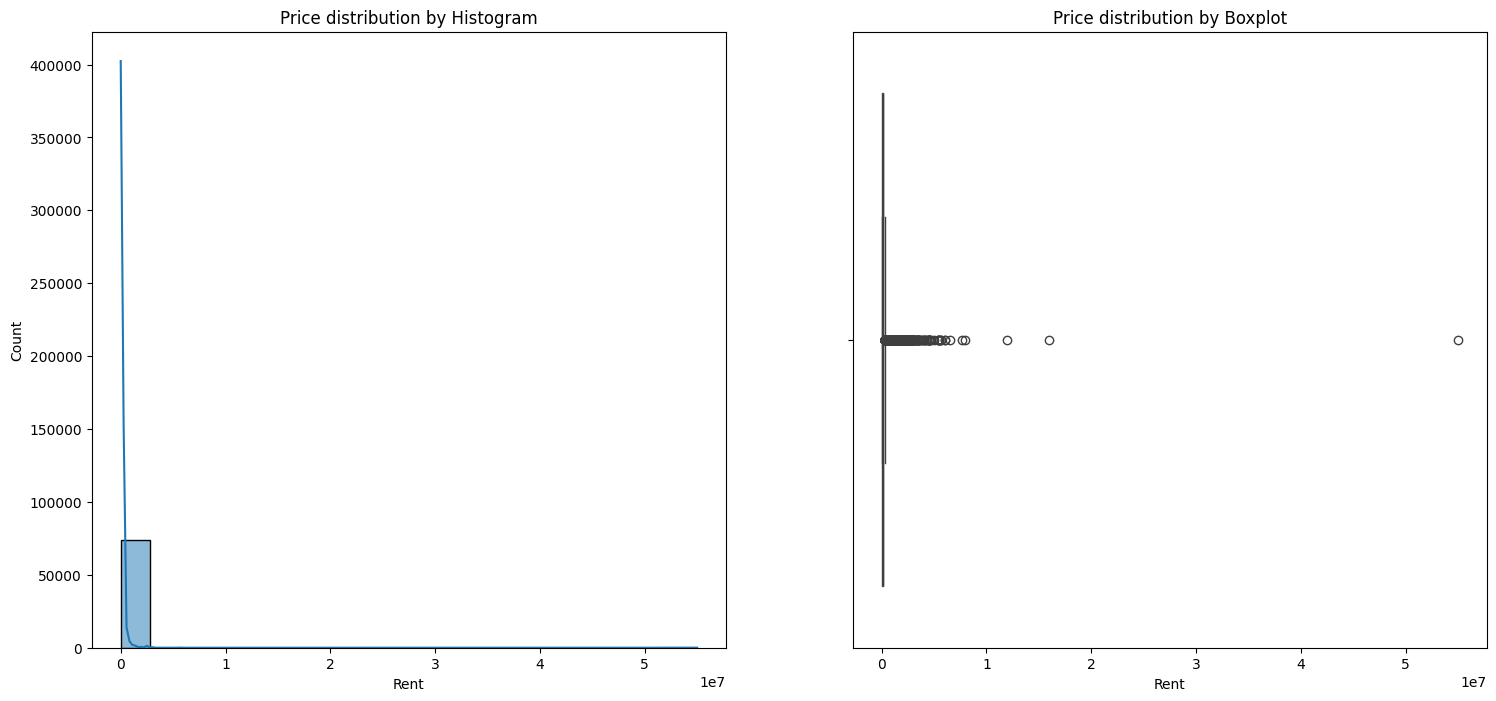

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'Rent', kde = True, ax = ax[0], bins = 20)
sns.boxplot(data = data, x = 'Rent')
ax[0].set_title('Price distribution by Histogram')
ax[1].set_title('Price distribution by Boxplot')
plt.show()

Based on the graph, we can see that the distribution is not pleasent, especially Histogram which contains only one block, where as we can see, this is caused by many outliers this feature has.<br>
Outlier can be seen on the boxplot, represented as the white dot

### Beds

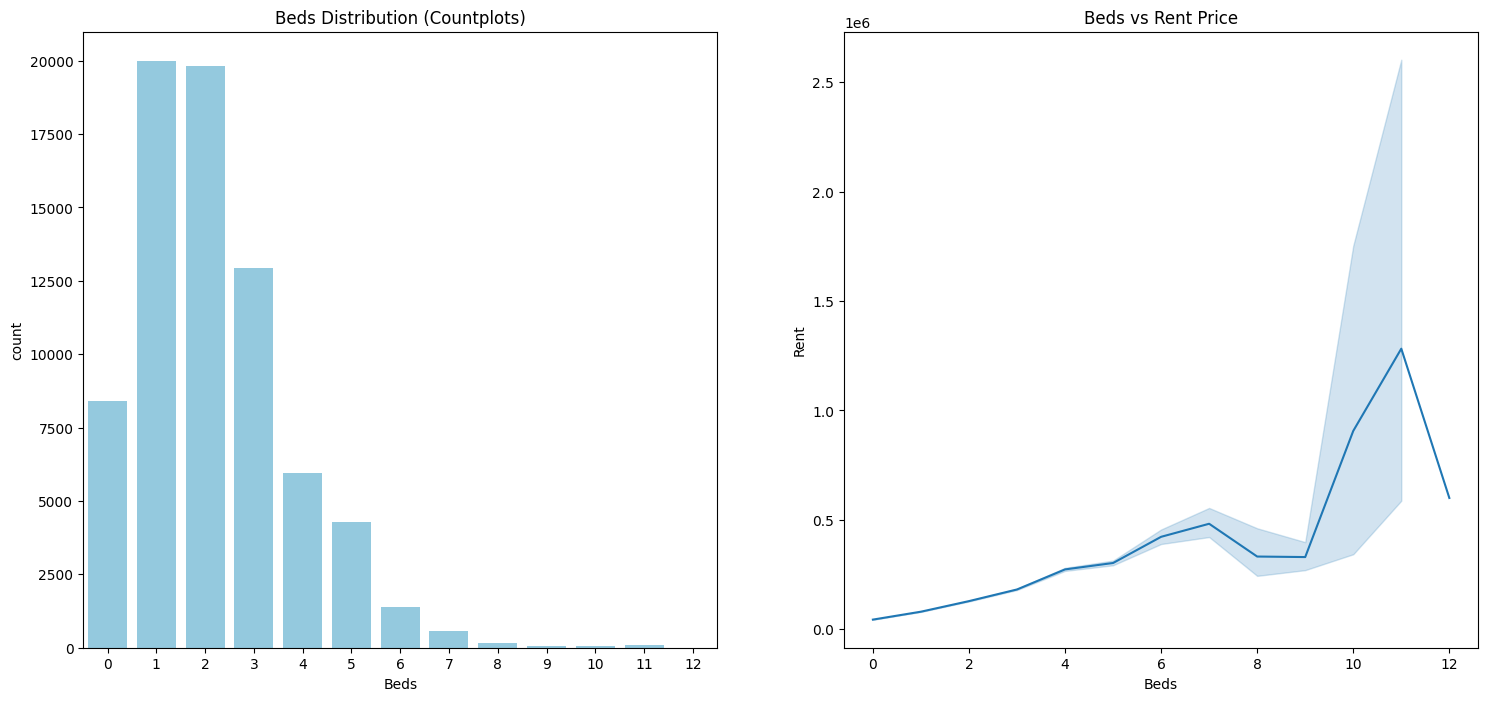

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
ax[0].set_title('Beds Distribution (Countplots)')
ax[1].set_title('Beds vs Rent Price')
sns.countplot(data = data, x= 'Beds', ax = ax[0], color = 'skyblue')
sns.lineplot(data = data, x ='Beds', y = 'Rent')
plt.show()

We can see that although the number of beds is mostly around < 4, however the number of beds increase the Rent Price linearly

### Baths

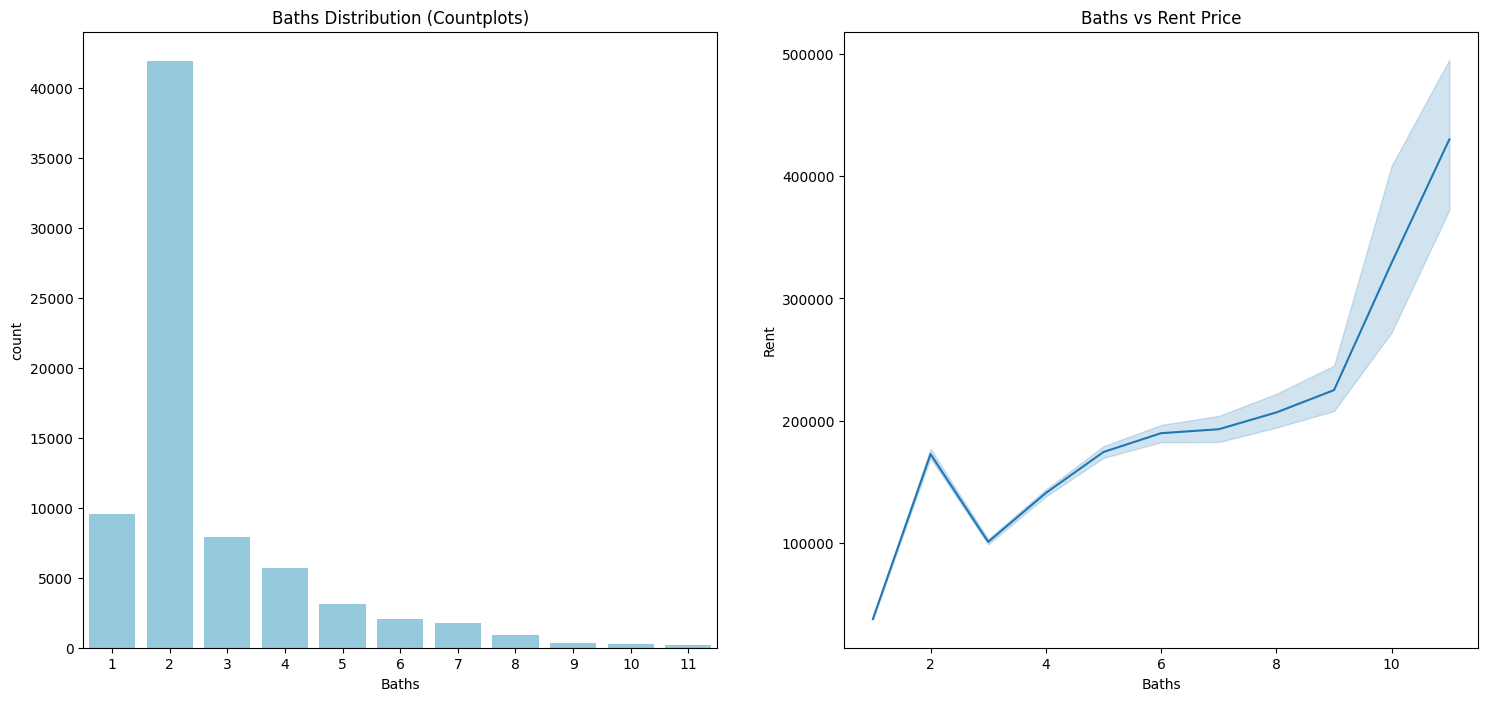

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
ax[0].set_title('Baths Distribution (Countplots)')
ax[1].set_title('Baths vs Rent Price')
sns.countplot(data = data, x= 'Baths', ax = ax[0], color = 'skyblue')
sns.lineplot(data = data, x ='Baths', y = 'Rent')
plt.show()

Based on the graph, Baths has similar result with beds, where as the number of Baths rise, the higher the Rent Price linearly.

### Type (Property Type)

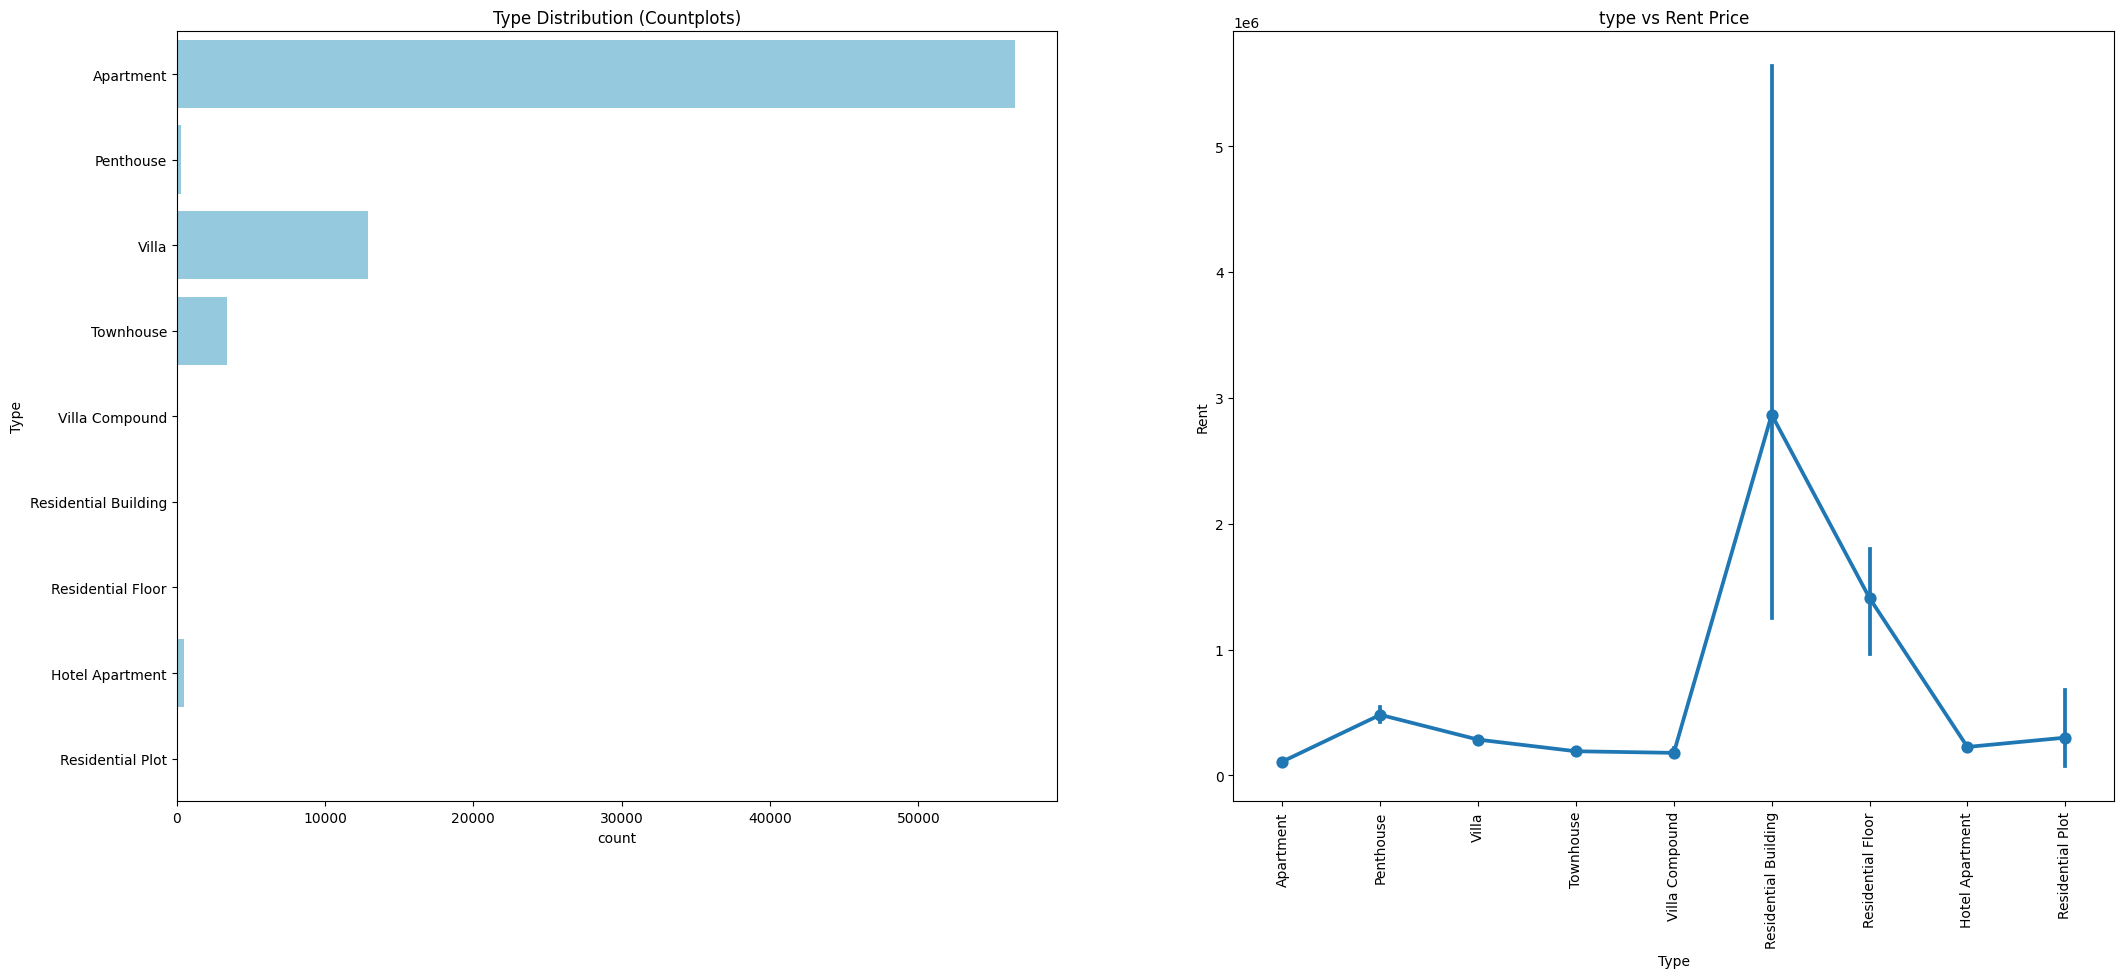

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (25, 10))
ax[0].set_title('Type Distribution (Countplots)')
ax[1].set_title('type vs Rent Price')
sns.countplot(data = data, y= 'Type', ax = ax[0], color = 'skyblue')
sns.pointplot(data = data, x ='Type', y = 'Rent')
plt.xticks(rotation = 90)
plt.show()

### Area in Sqft

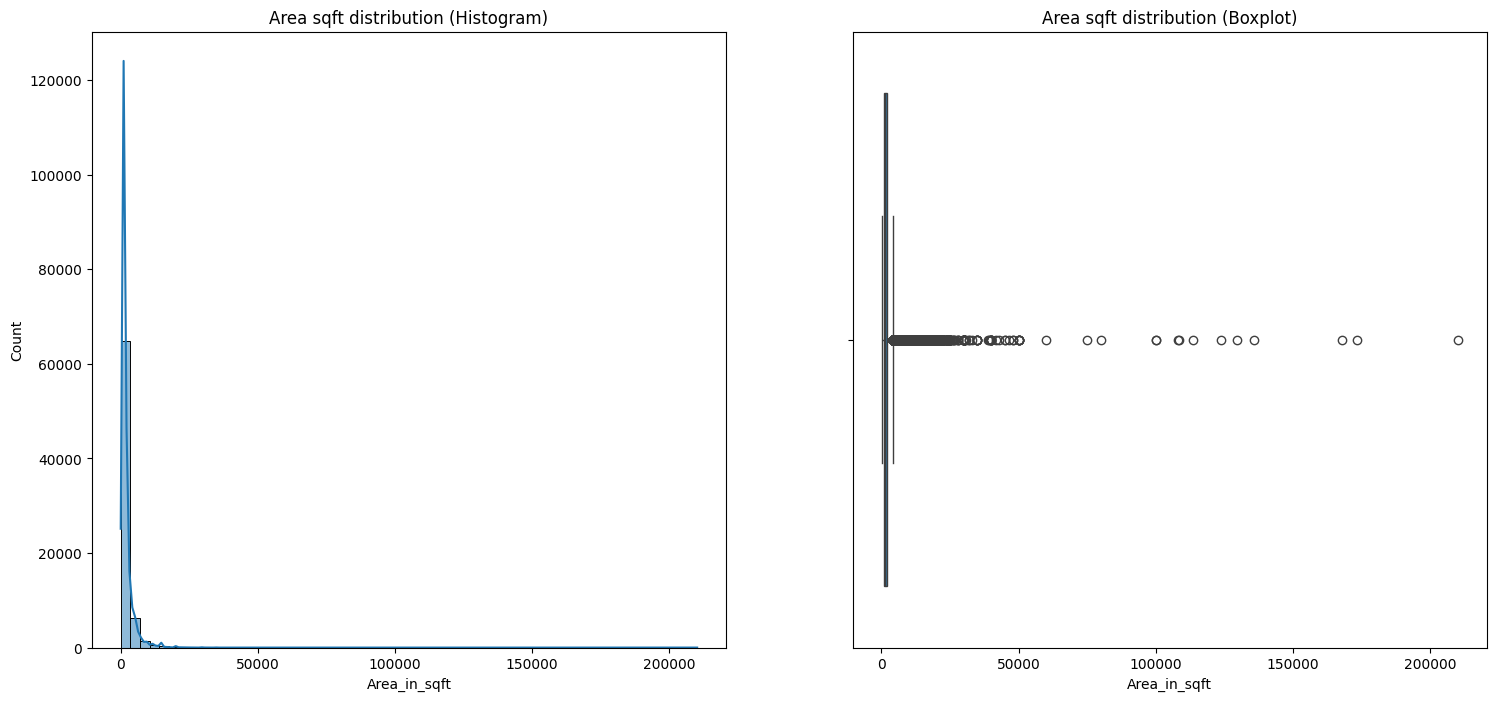

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'Area_in_sqft', ax = ax[0], bins = 60, kde = True)
ax[0].set_title('Area sqft distribution (Histogram)')
ax[1].set_title('Area sqft distribution (Boxplot)')
sns.boxplot(data = data, x ='Area_in_sqft')
plt.show()

Here, we can see that the reason Area sqft perform a skewed right is because it containt so many outliers as seen in Boxplot

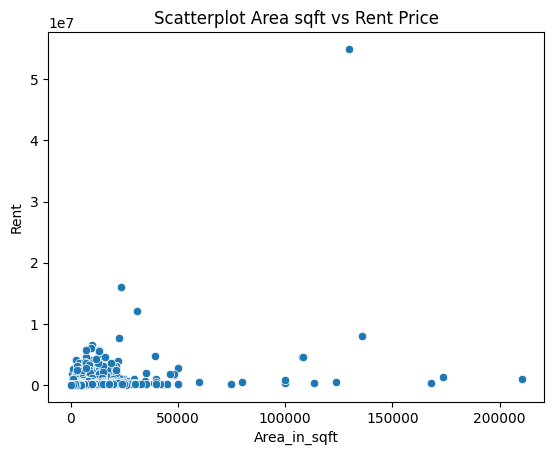

In [12]:
sns.scatterplot(data = data, x = 'Area_in_sqft', y = 'Rent')
plt.title('Scatterplot Area sqft vs Rent Price')
plt.show()

However, based on this graph there isn't any pattern we can conclude from this graph

### Rent per sqft

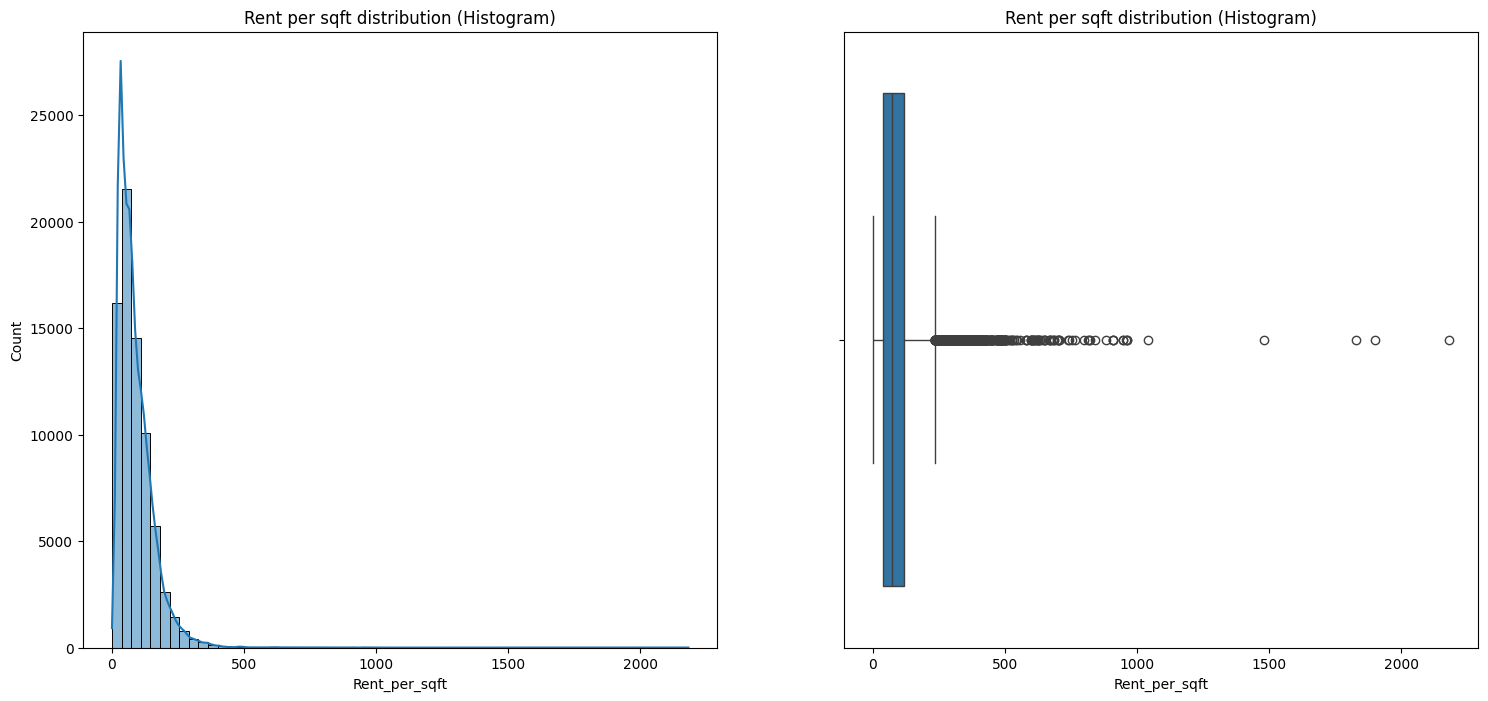

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'Rent_per_sqft', ax = ax[0], bins = 60, kde = True)
ax[0].set_title('Rent per sqft distribution (Histogram)')
ax[1].set_title('Rent per sqft distribution (Histogram)')
sns.boxplot(data = data, x ='Rent_per_sqft')
plt.show()

Same as Area sqft, where Rent per sqft also perform right skewed distribution as consequence for many outliers this data have that can be seen in the boxplot (outlier)

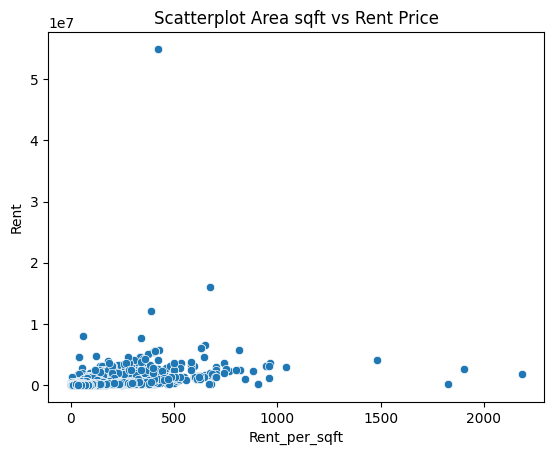

In [14]:
sns.scatterplot(data = data, x = 'Rent_per_sqft', y = 'Rent')
plt.title('Scatterplot Area sqft vs Rent Price')
plt.show()

Rent per sqft also did not have specific patternt hat we can take for Rent Price

### Area & Rent

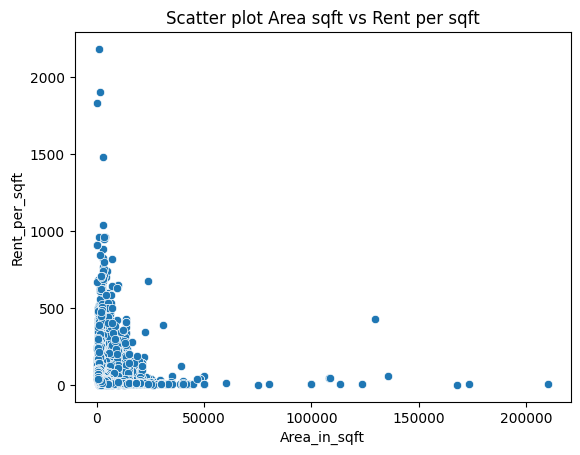

In [15]:
sns.scatterplot(data = data, x = 'Area_in_sqft', y = 'Rent_per_sqft')
plt.title('Scatter plot Area sqft vs Rent per sqft')
plt.show()

Surprisingly there is no pattern we can take from Area sqft and Rent per sqft

### Rent Category

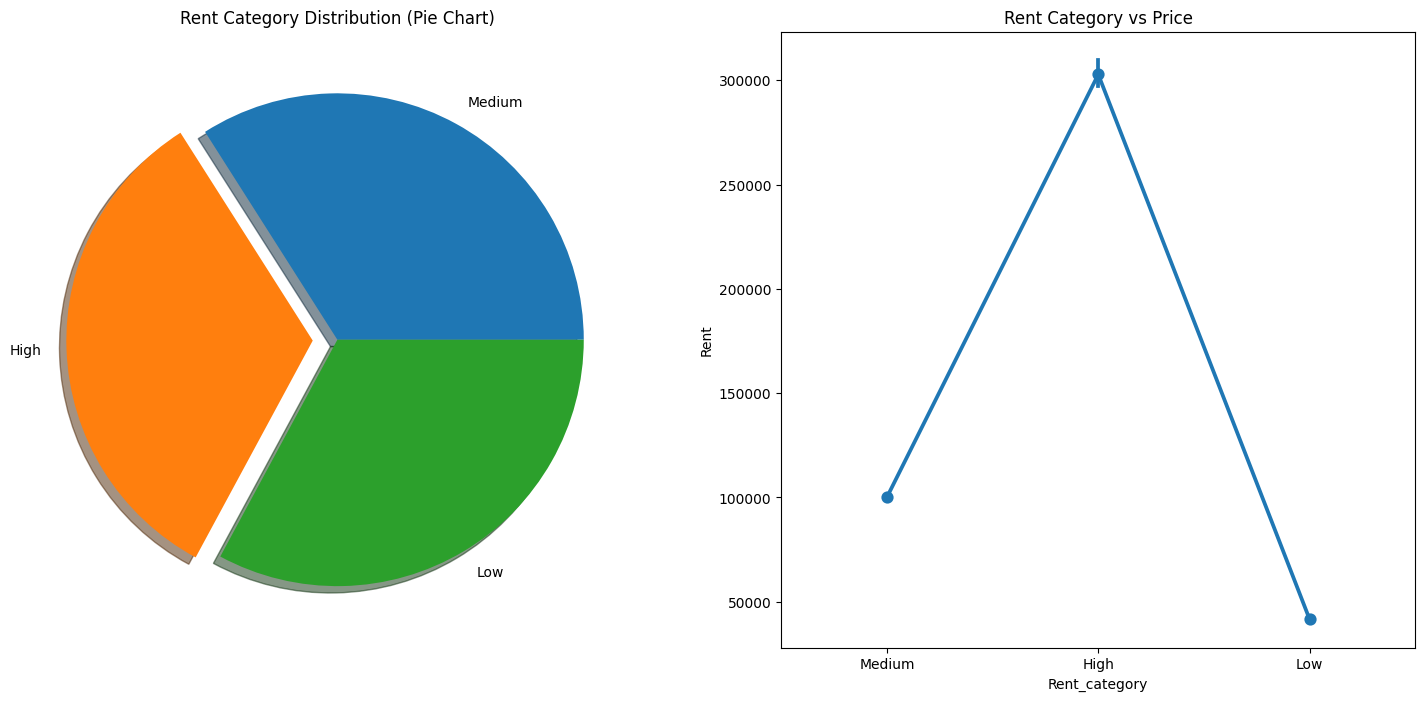

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Rent_category'].value_counts().plot(kind = 'pie', ax = ax[0], shadow = True, explode = [0, 0.1, 0])
ax[0].set_ylabel('')
ax[0].set_title('Rent Category Distribution (Pie Chart)')
ax[1].set_title('Rent Category vs Price')
sns.pointplot(data = data, x = 'Rent_category', y = 'Rent')
plt.show()

We can see that the higher the category is (High, Medium, Low) the higher the Rent Price is

### Frequency (Rent Frequency)

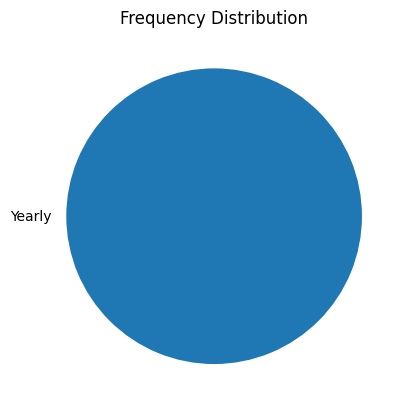

In [17]:
data['Frequency'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Frequency Distribution')
plt.show()

As for frequency there is nothing we can look at, as all data entries all are Yearly

### Furnishing

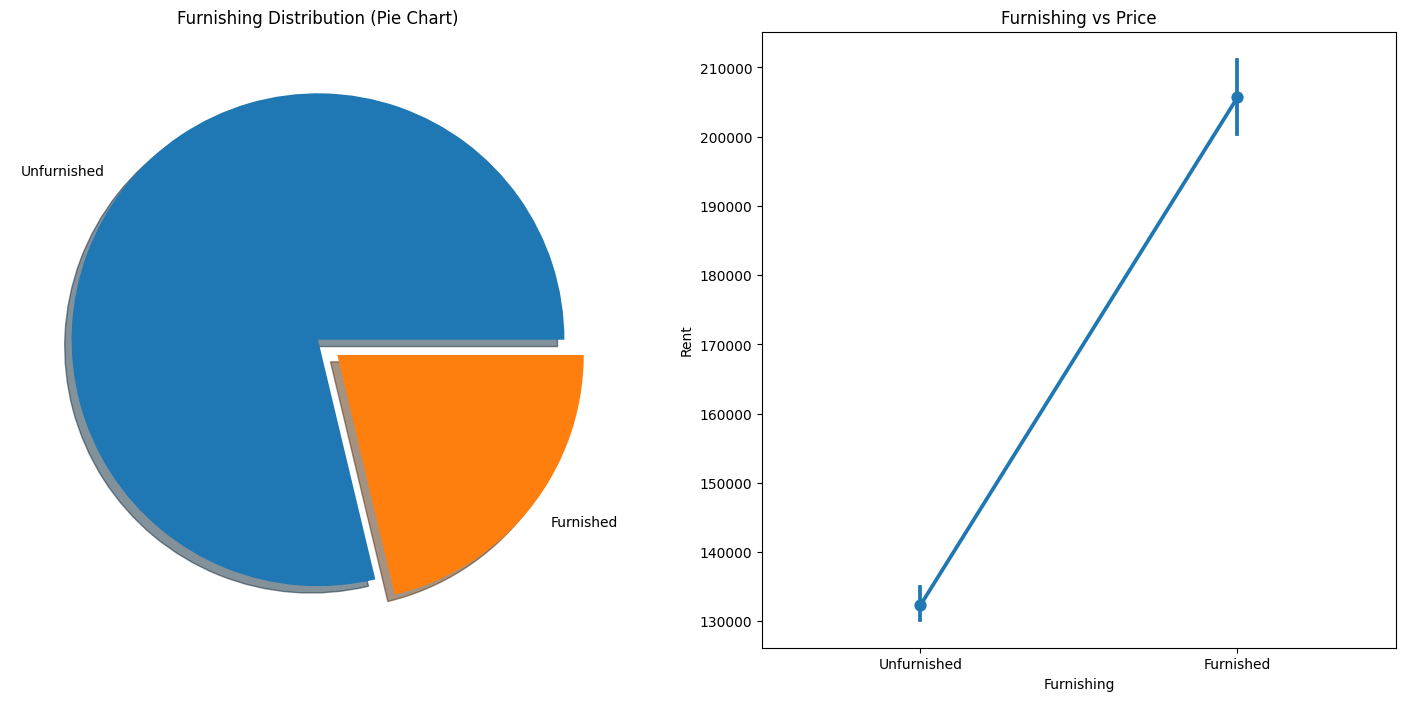

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Furnishing'].value_counts().plot(kind = 'pie', ax = ax[0], shadow = True, explode = [0, 0.1])
ax[0].set_ylabel('')
ax[0].set_title('Furnishing Distribution (Pie Chart)')
ax[1].set_title('Furnishing vs Price')
sns.pointplot(data = data, x = 'Furnishing', y = 'Rent')
plt.show()

Here, we can see that the property that is Furnished has a higher value, thus lifting the Rent Price

### Purpose

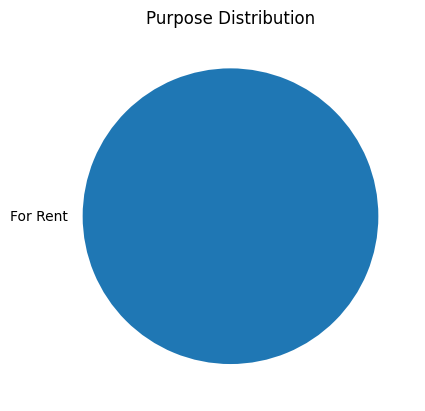

In [19]:
data['Purpose'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Purpose Distribution')
plt.show()

Same with Rent Frequency, where all the property here have the same purpose, For Rent. Thus, nothing we can look at here.

### Posted Date

In [20]:
data['Posted_date'] = pd.to_datetime(data['Posted_date'])
rental_trend = data.groupby(data['Posted_date'].dt.to_period('M'))['Rent'].mean().reset_index()
rental_trend['Posted_date'] = rental_trend['Posted_date'].astype(str)  # Convert Period to string

fig = px.line(rental_trend, x='Posted_date', y='Rent', 
              title='Average Monthly Rent Prices Over Time', 
              labels={'Posted_date': 'Month', 'Rent': 'Average Rent (AED)'},color_discrete_sequence=['red'])
fig.show()

While the price is sometimes unstable, but we can interpret that the newest property has a higher price than the older property.

### Age Listing days

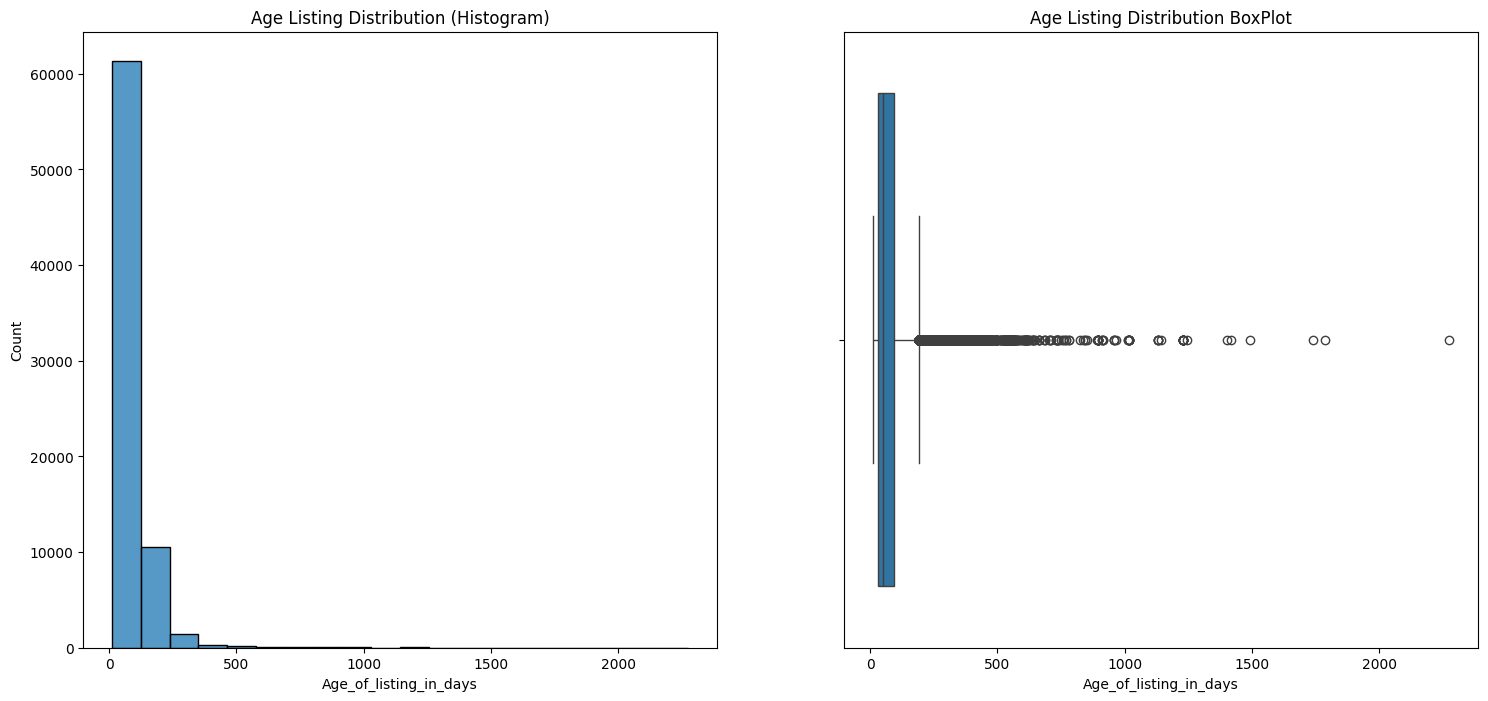

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'Age_of_listing_in_days', ax = ax[0], bins = 20)
ax[0].set_title('Age Listing Distribution (Histogram)')
sns.boxplot(data = data, x = 'Age_of_listing_in_days')
ax[1].set_title('Age Listing Distribution BoxPlot')
plt.show()

Age listing also performed a right skewed distribution, in responds to many outliers this feature has, which can be seen in Boxplot

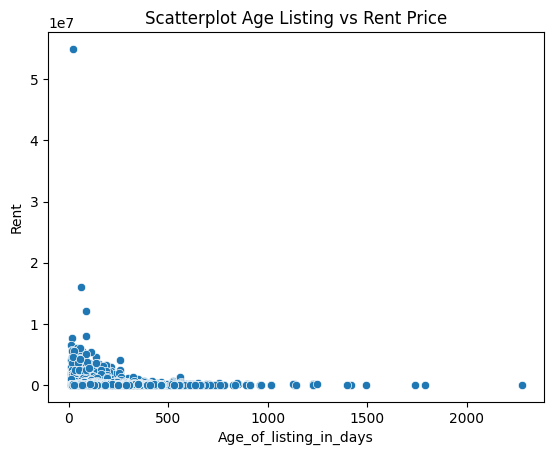

In [33]:
sns.scatterplot(data = data, x = 'Age_of_listing_in_days', y = 'Rent')
plt.title('Scatterplot Age Listing vs Rent Price')
plt.show()

However Age of Listing does not play significant role in determining Rent Price